In [42]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "drive/My Drive/Colab Notebooks/Social_Network.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


#1)#

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [44]:
x=df.iloc[:, 1:-1].values
print(x[0:10])

[[    0    26 43000]
 [    0    27 57000]
 [    0    27 84000]
 [    0    35 65000]
 [    0    26 80000]
 [    0    26 52000]
 [    0    21 16000]
 [    0    28 44000]
 [    0    33 28000]
 [    0    26 72000]]


#2)#

In [45]:
y = df.iloc[:, -1].values
print(y[0:10])

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


#3)#

In [46]:
df['Purchased']= df['Purchased'].replace({'Yes':1, 'No':0})
df['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Purchased, Length: 400, dtype: int64

#4)#

In [47]:
y = df.iloc[:, -1].values
print(y[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

#5)#

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#6)#

In [50]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

In [52]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

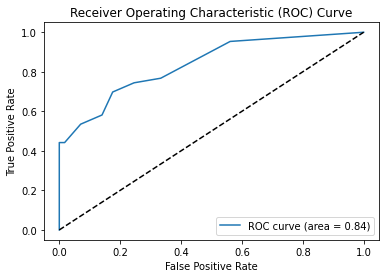

In [57]:
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [54]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[49  8]
 [21 22]]
Accuracy:  0.71
Specificity:  0.8596491228070176
Recall:  0.5116279069767442
Precision:  0.7333333333333333
F1-score:  0.6027397260273971
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        57
           1       0.73      0.51      0.60        43

    accuracy                           0.71       100
   macro avg       0.72      0.69      0.69       100
weighted avg       0.71      0.71      0.70       100

AUC score:  0.7635658914728682
True positive:  22
True negative:  49


#7)#

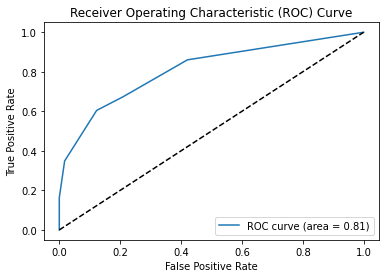

Accuracy:  0.71
F1-score:  0.6027397260273971
AUC score:  0.8108935128518973
True positive:  22
True negative:  49






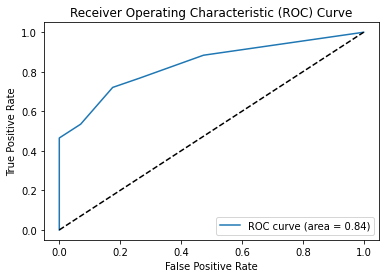

Accuracy:  0.71
F1-score:  0.6027397260273971
AUC score:  0.835985312117503
True positive:  22
True negative:  49






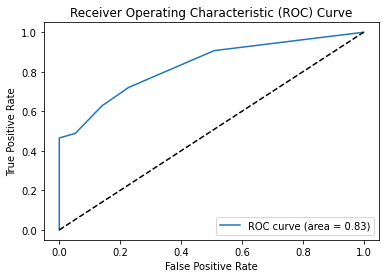

Accuracy:  0.71
F1-score:  0.6027397260273971
AUC score:  0.8300693594451243
True positive:  22
True negative:  49






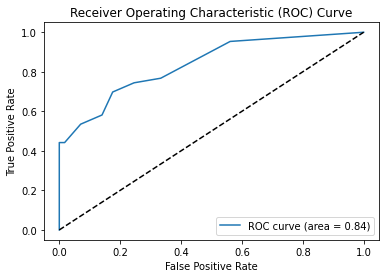

Accuracy:  0.71
F1-score:  0.6027397260273971
AUC score:  0.8365973072215422
True positive:  22
True negative:  49






In [58]:
t=(5,7,9,11)
for i in t:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  conf_matrix = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  specificity = tn / (tn + fp)
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  f1_score = 2 * precision * recall / (precision + recall)
  y_pred_proba = knn.predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()
  print("Accuracy: ", accuracy)
  
  print("F1-score: ", f1_score)
  print("AUC score: ", auc_score)
  print("True positive: ",tp)
  print("True negative: ", tn)
  print("\n\n\n")